<a href="https://colab.research.google.com/github/Prakriti-Bhatt/The-Sparks-Foundation-GRIP/blob/main/Task2_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**THE SPARKS FOUNDATION-GRIP**
#**Data Science and Business Analytics Internship**

**Name: PRAKRITI BHATT**

**TASK 2: PREDICTION USING UNSUPERVISED ML**

**Objective** : From the iris dataset , predict number of clusters and represent it visually.

## **Importing all libraries**

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn import datasets

In [ ]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## **ANALYSIS**

In [ ]:
iris_df.isnull().sum()   ## checking valus are null or not

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


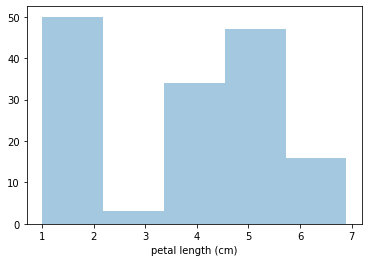

In [ ]:
sns.distplot( a = iris_df['petal length (cm)'] , kde=False)  # ploting petal lenghts as cm as a scale 

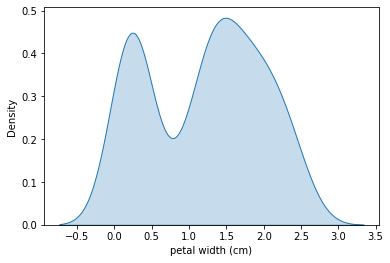

In [ ]:
sns.kdeplot(data = iris_df['petal width (cm)'] , shade = True)

## **Finding the optimum number of Clusters for K-Means**

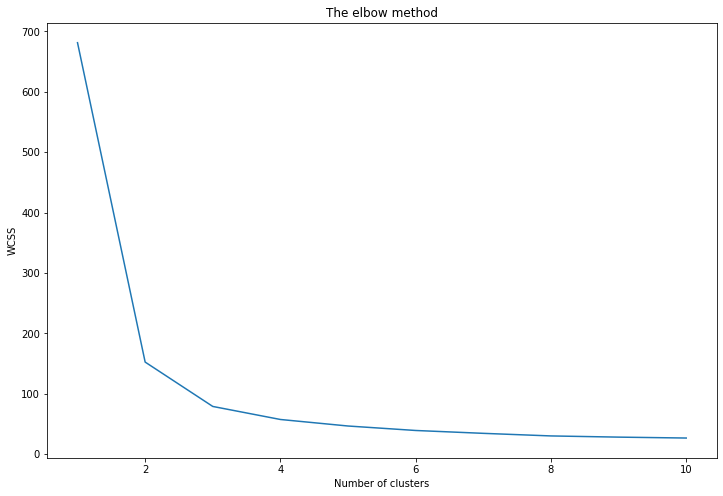

In [ ]:
plt.figure(figsize=(12,8))
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of squares
#this loop will fit the k-means algorithm to our data and 
#second we will compute the within cluster sum of squares and appended to our wcss list.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# i above is between 1-10 numbers. init parameter is the random initialization method .
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
#find the final clusters when the K-means algorithm is running. we enter the default value of 300 the 
#next parameter is n_init which is the number of times the K_means algorithm will be run with 
#different initial centroid.
#kmeans inertia_ attribute is Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [ ]:
# creating k-means classifiers 
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

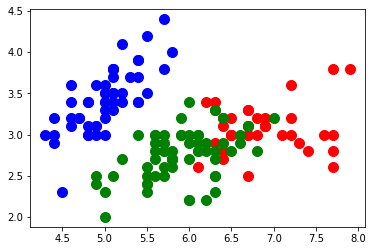

In [ ]:
# visualising the cluster on first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c="red")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c="blue")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c="green")

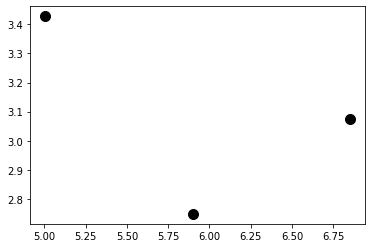

In [ ]:
#ploting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="black", label = "Centroids")